# Project 4, APS1070 Fall 2023
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**:Chuhan Chen
*   Your **student number**:1006057213

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

In [21]:
%%shell
jupyter nbconvert --to html

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `jupyter nbconvert --to html /content/APS1070_Project_4 (1).ipynb'


CalledProcessError: ignored

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [ ]:
print(df)

In [3]:
from sklearn.model_selection import train_test_split

#Keep the numerical features
df = df.select_dtypes(include=['number'])

#split data
X = df.drop('shares', axis=1).values
y = df['shares'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)


#manually standardize
means = np.mean(X_train, axis=0)
std_devs = np.std(X_train, axis=0)
X_train_std = (X_train - means) / std_devs
X_val_std = (X_val - means) / std_devs

# Insert a column of 1s
ones_train = np.ones((X_train_std.shape[0], 1))
X_train_std = np.hstack((ones_train, X_train_std))
ones_test = np.ones((X_val_std.shape[0], 1))
X_val_std = np.hstack((ones_test, X_val_std))

print(X_val_std)

[[ 1.         -0.69808844  0.75805024 ...  0.29535111 -1.67434975
  -0.02648497]
 [ 1.          1.58173839 -0.18805827 ... -0.27125578  0.31117635
  -0.69126839]
 [ 1.          0.06808287  1.23110449 ...  0.25487919 -1.18269567
  -0.0739695 ]
 ...
 [ 1.         -0.8429135  -0.66111252 ... -0.27125578  0.84064998
  -0.69126839]
 [ 1.         -1.42221376  0.28499598 ... -0.27125578  0.84064998
  -0.69126839]
 [ 1.         -1.32410646  1.23110449 ... -0.27125578  0.84064998
  -0.69126839]]


Q3:
We should not insert the column of  1 s prior to standardization because it may affect the result of standardization. The process of standardization used mean and standard deviation of each feature. A column of 1s is a constant which not need to be standardized and will affect the result of mean and standard deviation.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [5]:
from scipy import linalg
from sklearn.metrics import mean_squared_error

W = np.dot(np.linalg.inv(np.dot(X_train_std.T, X_train_std)), np.dot(X_train_std.T, y_train))

y_trainPred = np.dot(X_train_std, W)
y_valPred = np.dot(X_val_std, W)

#RMSE
RMSE_train = np.sqrt(mean_squared_error(y_trainPred, y_train))
RMSE_val = np.sqrt(mean_squared_error(y_valPred, y_val))
print('Training set RMSE:', RMSE_train)
print('Validation set RMSE:', RMSE_val)

Training set RMSE: 12166.043643683284
Validation set RMSE: 8267.247724101031


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

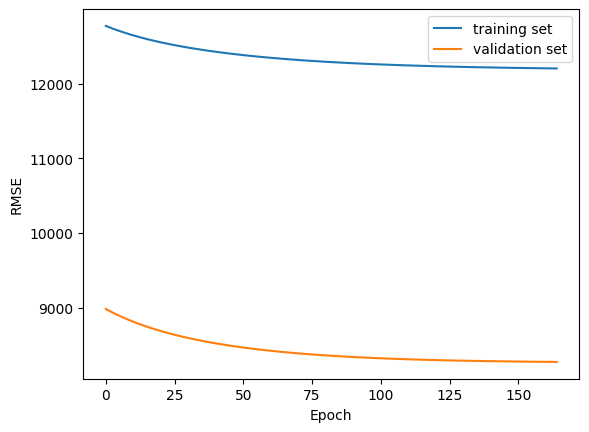

--- Total Training Time: 1.096081018447876 (s) ---


In [6]:
import matplotlib.pyplot as plt
import time
start_time = time.time() ## Records current time
np.random.seed(2)

rmse_direct = RMSE_val
CT = 1.001*rmse_direct
lr = 0.01
w = (np.random.random(X_train_std.shape[1])/1000)

def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))
rmse_train = []
rmse_val = []

for epoch in range (0, 5000):
  y_trainPred = np.dot(X_train_std,w.T)
  rmse_train.append(rmse(y_trainPred,y_train))
  gradient = (1/len(y_trainPred) * np.dot(X_train_std.T, y_trainPred-y_train))
  w = w - lr * gradient
  y_valPred = np.dot(X_val_std,w.T)
  rmse_val.append(rmse(y_valPred,y_val))

  if rmse(y_valPred, y_val) <= CT:
    break

plt.plot(rmse_train, label = 'training set')
plt.plot(rmse_val, label = 'validation set')
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## GD Script -- Sample code in tutorial! ##

print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

This model is underfitting by observing the training and validation RMSE. The training set has large RMSE value, range above 12000, while the RMSE value of validation set is below 9000. It has a poor performance on the training set and not able to generalize the new data.

The difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch): An epoch is means one complete process that pass through the whole training set. One epoch may contain many iterations which every sample from the training set will be used once. An iteration is a process to update parameter of the model once. In SGD and mini-batch gradient descent, an epoch pass through many iterations using the whole training set once, while an iteration only update model's parameters without go through the whole training set.   

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [7]:
import time
def mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, lr, CT):
#initial assign
  weight = []
  rmse_val_batch =[]
  rmse_train_batch =[]
  time_elapsed = []
  epoch = 0
  w_batch = (np.random.random(X_train_std.shape[1])/1000)
  rmse_val_test = CT + 0.1
  number_of_rows = X_train_std.shape[0]

  start_time = time.time()

  while rmse_val_test >= CT:
    shuffled_indices = np.random.permutation(X_train_std.shape[0]) #shuffle data
    X_train_shuffled = X_train_std[shuffled_indices]
    y_train_shuffled = y_train[shuffled_indices]

    for i in range(0, number_of_rows , batch_size):
      X_train_batch = X_train_shuffled[i:i + batch_size]
      y_train_batch = y_train_shuffled[i:i + batch_size]
      y_pred = np.dot(X_train_batch, w_batch.T)
      gradient = (1/len(y_pred)* np.dot(X_train_batch.T, (y_pred - y_train_batch)))
      w_batch= w_batch- lr * gradient

    y_train_pre = np.dot(X_train_std, w_batch.T)
    rmse_train_batch.append(rmse(y_train_pre, y_train))
    y_val_pre = np.dot(X_val_std, w_batch.T)
    rmse_val_test = rmse(y_val_pre, y_val)
    rmse_val_batch.append(rmse_val_test)

    if epoch > 0 and rmse_val_test > rmse_val_batch[-2]:
        print('diverge:', batch_size)
        break;

    weight.append(w_batch)
    end_time = time.time()
    time_elapsed.append(end_time - start_time)
    epoch = epoch + 1
  total_time = time_elapsed[-1]
  final_w = weight[-1]
  return final_w, rmse_train_batch, rmse_val_batch, time_elapsed, total_time


In [8]:
lr=0.01
rmse_direct = RMSE_val
CT = 1.001 * rmse_direct
batch_size = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
for bs in batch_size:
  final_w, rmse_train_batch, rmse_val_batch, time_elapsed, total_time = mini_batch_gradient_descent(X_train_std, y_train, X_val_std, y_val, bs, lr, CT)


diverge: 2
diverge: 4
diverge: 8
diverge: 16
diverge: 32
diverge: 128


According to the result above, the model converges start from batch size of 256. In the following graph, I will try the batch size from 256.

diverge: 256


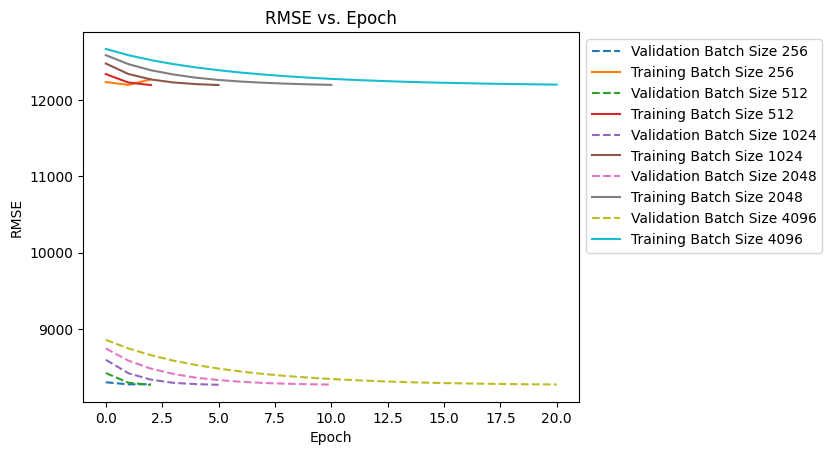

In [16]:
import matplotlib.pyplot as plt
batch_sizes = [256, 512, 1024, 2048, 4096]
for x in batch_sizes:
  final_w, rmse_train_batch, rmse_val_batch, time_elapsed, total_time = mini_batch_gradient_descent(X_train_std, y_train, X_val_std, y_val, x, lr, CT)

  plt.title('RMSE vs. Epoch')
  plt.plot(range(len(rmse_val_batch)), rmse_val_batch, label = 'Validation Batch Size {}'.format(x),linestyle = 'dashed')
  plt.plot(range(len(rmse_train_batch)), rmse_train_batch, label = 'Training Batch Size {}'.format(x))
  plt.xlabel('Epoch')
  plt.ylabel('RMSE')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

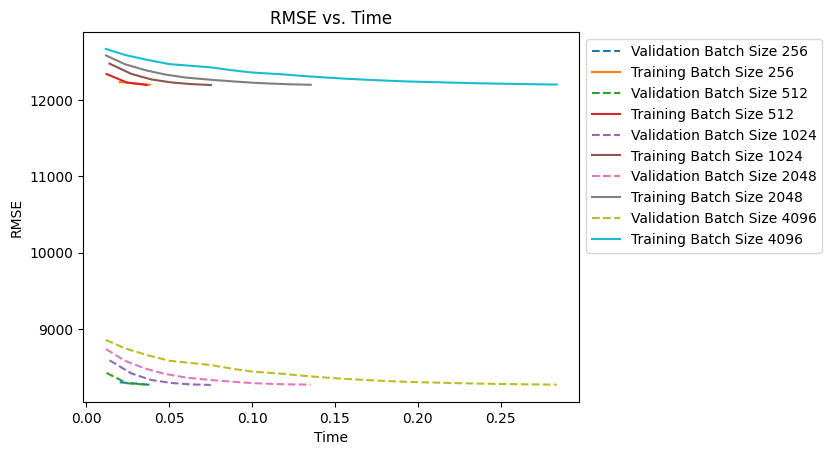

In [18]:
batch_sizes = [256, 512, 1024, 2048, 4096]
for x in batch_sizes:
  final_w, rmse_train_batch, rmse_val_batch, time_elapsed, total_time = mini_batch_gradient_descent(X_train_std, y_train, X_val_std, y_val, x, lr, CT)

  plt.title('RMSE vs. Time')
  plt.plot(time_elapsed, rmse_val_batch, label = 'Validation Batch Size {}'.format(x),linestyle = 'dashed')
  plt.plot(time_elapsed, rmse_train_batch, label = 'Training Batch Size {}'.format(x))

  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

Text(0, 0.5, 'Training time')

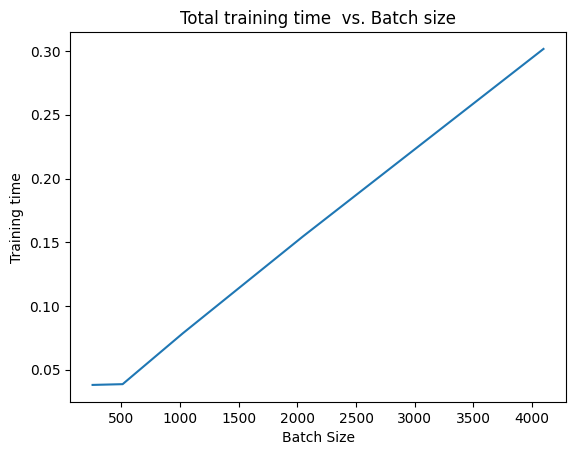

In [13]:
accumulate_time = []
batch_sizes = [256, 512, 1024, 2048, 4096]
for x in batch_sizes:
  final_w, rmse_train_batch, rmse_val_batch, time_elapsed, total_time = mini_batch_gradient_descent(X_train_std, y_train, X_val_std, y_val, x, lr, CT)
  accumulate_time.append(total_time)

plt.title('Total training time  vs. Batch size')
plt.plot(batch_sizes, accumulate_time)
plt.xlabel('Batch Size')
plt.ylabel('Training time')

First, I found that model is converge from batch size 256. So I try the batch size above 256 in the following graphs. The three graphs displayed the training and validation RMSE vs. number of epoch, and total training time used under different batch size.

From the first graph, I concluded that both training and validation rmse decreases as the number of epoch increases from 0 to 20. The trainging rmse is above 12000, and showing a trend approaching towards 12,000. The validation rmse is below 9000. The larger batch size is, the greater number of epoches needed to go through the process.

From the second graph, both training and validation rmse shows a decrease trend as time increase to 0.3. The larger batch size is, the longer time needed to go through the process.

From the last graph, as the batch size increases from 256 to 4096, the total training time increases from 0.02 to 0.3.


## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [14]:
# I pick batch size 8,16,32 which does not converge with lr = .01
def find_learning_rate(batch_size, initial_lr , CT, X_train_std, y_train, X_val_std, y_val):
  result = []

  for x in batch_size:
      for lr in [initial_lr, initial_lr / 5 ,initial_lr / 20]:
          final_w, rmse_train_batch, rmse_val_batch, time_elapsed, total_time = mini_batch_gradient_descent(X_train_std, y_train, X_val_std, y_val, x, lr, CT)
          if rmse_val_batch[-1] < rmse_val_batch[0]:
              result.append({
                    'Batch Size': x,
                    'Learning Rate': lr,
                    'Training RMSE': rmse_train_batch[-1],
                    'Validation RMSE': rmse_val_batch[-1]
              })
              break
  return result


In [15]:
import pandas as pd
initial_lr = .01
batch_size= [8, 16, 32]
rmse_direct = RMSE_val
CT = 1.001 * rmse_direct

for x in batch_size:
  result = find_learning_rate(batch_size, initial_lr , CT, X_train_std, y_train, X_val_std, y_val)

table_result = pd.DataFrame(result)
print(table_result)


diverge: 8
diverge: 8
diverge: 8
diverge: 16
diverge: 16
diverge: 32
diverge: 8
diverge: 8
diverge: 8
diverge: 16
diverge: 16
diverge: 8
diverge: 8
diverge: 8
diverge: 16
diverge: 16
diverge: 16
diverge: 32
   Batch Size  Learning Rate  Training RMSE  Validation RMSE
0           8         0.0005   12734.875507      8291.800205
1          16         0.0005   12320.693437      8286.959326
2          32         0.0005   12191.949810      8263.885184


**When the learning rate is 0.0005, the model converge with batch size of 8, 16, and 32.**

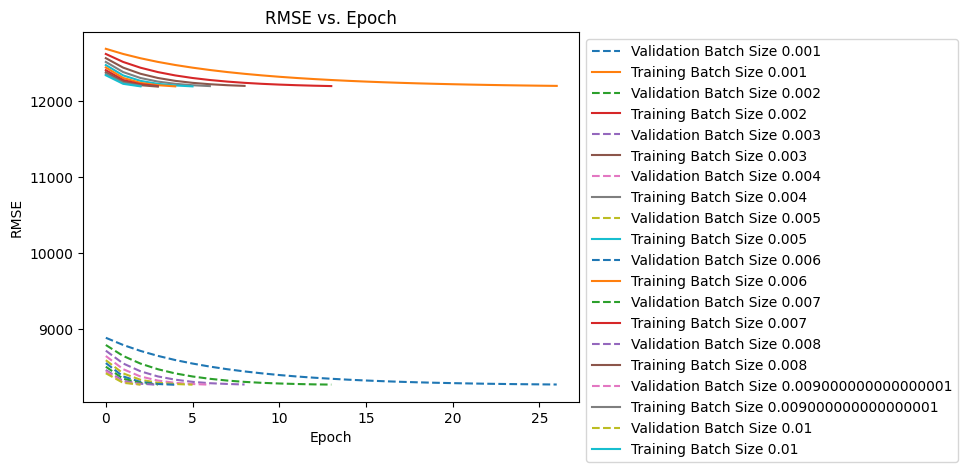

In [20]:
batch_size == 512
rmse_direct = RMSE_val
CT = 1.001 * rmse_direct

for lr in np.linspace(start=0.001, stop=0.01, num=10):
    final_w, rmse_train_batch, rmse_val_batch, time_elapsed, total_time = mini_batch_gradient_descent(X_train_std, y_train, X_val_std, y_val, batch_size, lr, CT)

    plt.title('RMSE vs. Epoch')
    plt.plot(range(len(rmse_val_batch)), rmse_val_batch, label = 'Validation Batch Size {}'.format(lr),linestyle = 'dashed')
    plt.plot(range(len(rmse_train_batch)), rmse_train_batch, label = 'Training Batch Size {}'.format(lr))
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

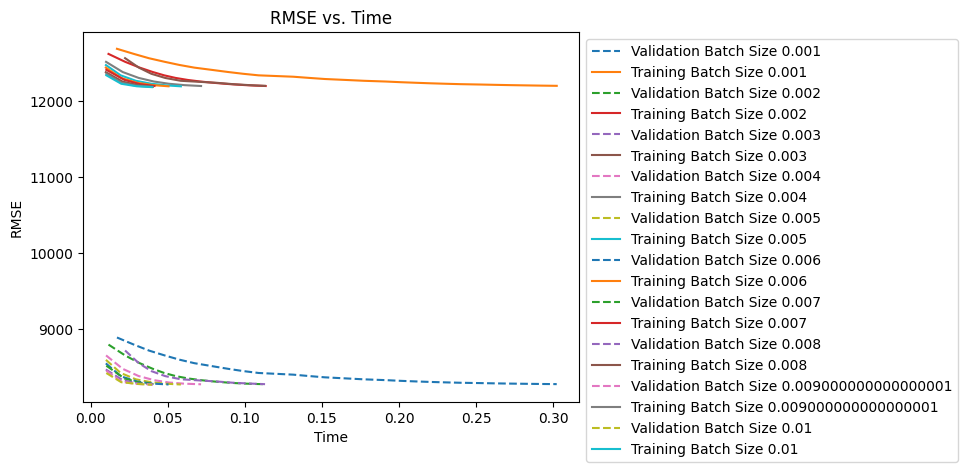

In [21]:
batch_size = 512
rmse_direct = RMSE_val
CT = 1.001 * rmse_direct

for lr in np.linspace(start=0.001, stop=0.01, num=10):
    final_w, rmse_train_batch, rmse_val_batch, time_elapsed, total_time = mini_batch_gradient_descent(X_train, y_train, X_val, y_val, batch_size, lr, CT)
    plt.title('RMSE vs. Time')
    plt.plot(time_elapsed, rmse_val_batch, label = 'Validation Batch Size {}'.format(lr),linestyle = 'dashed')
    plt.plot(time_elapsed, rmse_train_batch, label = 'Training Batch Size {}'.format(lr))

    plt.xlabel('Time')
    plt.ylabel('RMSE')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))



In this section, I tried the different 10 learning rate from 0.001 to 0,01 with the batch size of 512. I concluded that the smaller learning rate required longer running time and greater number of epoches from two graphs.

The first graph displayed the number of epoches needed with different learning rate for both training and validation set. The smaller learning rate need more epoches, and the rmse for both training and validation is decrease as epoch increases.

The second graph displayed the total time need with different learning rate. The smaller learning rate need more time to process.